# Лабораторная работа №4
# Применение методов классификации

**Цель работы: изучить алгоритмы и методы классификации на практике.**

### Вариант задания:
	Вариант №15. Фитнес клуб
	Содержит информацию о посетителях фитнес клуба
1. Пол
2. Близкое расположение
3. Сотрудник компании партнера
4. По промо друзей
5. Указан ли телефон
6. Длительность текущего абонемента
7. Посещение групповых занятий
8. Возраст
9. Средние траты на доп услуги
10. Количество месяцев до окончания абонемента
11. Время с момента первого обращения в фитнес-центр (в месяцах) 
12. Средняя частота посещений
13. Средняя частота посещений в месяц
14. Ушел ли из фитнес клуба

В начале, импортируем все необходимые для работы библиотеки, а также импортируем набор данных.

In [2]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, precision_score, recall_score,accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_rows = 4000
%matplotlib inline
df = pd.read_csv('5gym_churn.csv')
df = df.rename(columns={'gender':'Gender'})
result_metrics = []
df

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
df = df.dropna(subset=['Gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age',
                       'Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total',
                       'Avg_class_frequency_current_month','Churn'])
df = df.drop_duplicates()
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Таким образом. был провена предварительная подготовка данных.

Далее, изучим данный набор данных при помощи исследовательского анализа данных.

<AxesSubplot:ylabel='Density'>

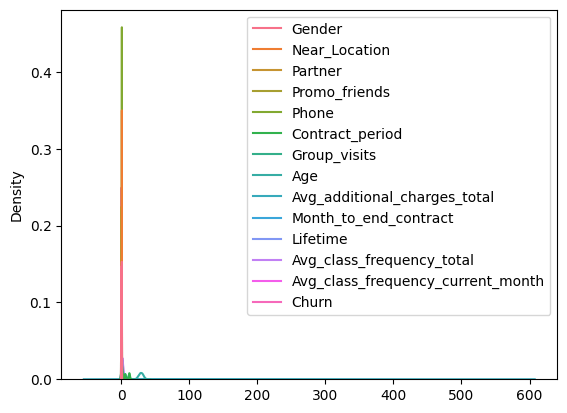

In [4]:
sns.kdeplot(df)

Однако видно, что так как у данного набора данных имеется множество данных (от 0 до 1), то график получается неинформативным. В связи с этим, можно оставить лишь некоторые данные, которые не являются дискретными.

<AxesSubplot:ylabel='Density'>

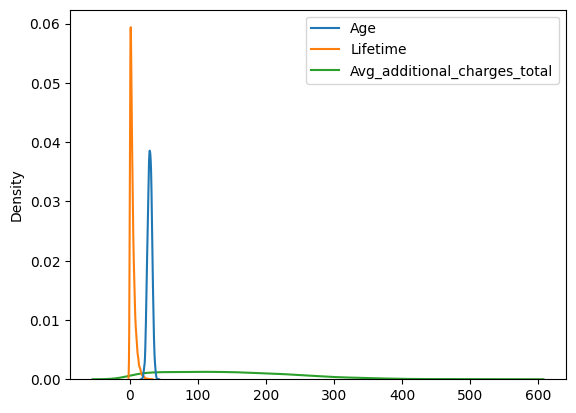

In [5]:
sns.kdeplot(df[['Age','Lifetime','Avg_additional_charges_total']])

В итоге, даже тут видно, что время в клубе, а также возвраст имеют большую плотность распределения, по сравнению с средними затратами. Однако, схема все равно не является удобной для анализа и формирования результатов.

Однако, значения можно проанализировать и другими способоами. Для этого, предварительно, необходимо стандартизироввать данные.


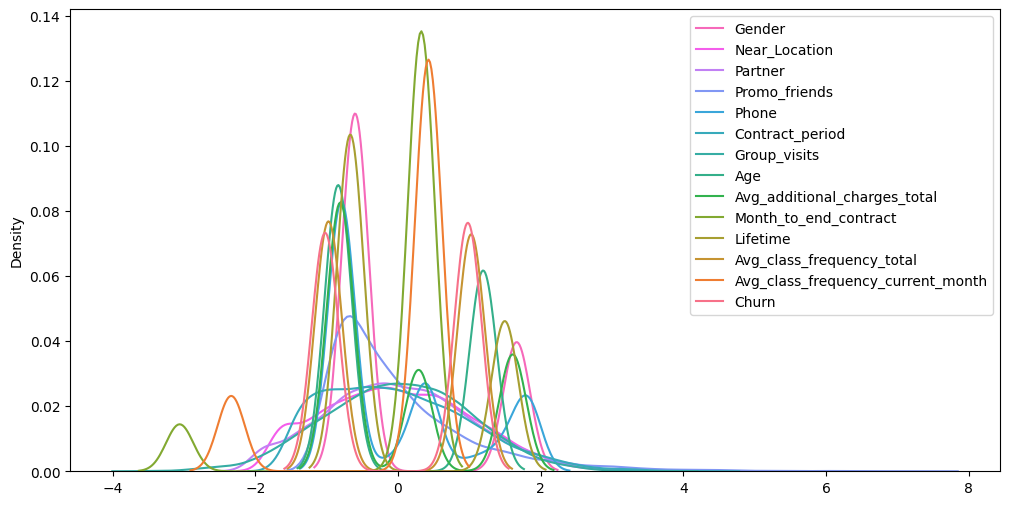

In [6]:
df_for_ka = df
sc = StandardScaler()
X_sc = sc.fit_transform(df_for_ka)
plt.figure(figsize=(12,6))
sns.kdeplot(X_sc)
plt.legend(labels = ['Gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age',
                       'Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total',
                       'Avg_class_frequency_current_month','Churn'])

В итоге, при помои стандартизации, получилось привести значения к общему виду, и с их помощью провести анализ по значимости данных параметров.

Так видно, что имеется несколько параметров, которые имеют небольшой разброс, например, месяц окончания контракта и частота посещений занятий в месяц. Поэтому, данные параметры можно отбросить.

Далее, необходимо произвести разделение данных на тесовую выборку и выборку, на которой будет производиться проверка. Для этого можно использовать функцию train_test_split, которая случайным образом формирует выборки, а также перемешивает строки между собой.

In [7]:
x_train,x_test,y_train,y_test = train_test_split(df[['Gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age',
                       'Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total',
                       'Avg_class_frequency_current_month']],df['Churn'],train_size = 0.30, random_state = 0)

Таким образом, получилась нужная выборка. Далее, получившуюся выборку необходимо стандартизировать для того, чтобы привести все значения к единому виду и чтобы можно было легко в последствии проводить классификацию.

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Далее, был выбран первый метод классификации - метод k- ближайших соседей. Данный метод работает аналогично методу k-средних для кластеризаации, и так как для K-средних выбиралось 2 кластера, то в данном случае, будет выбираться именно два соседа.

In [9]:
KN = KNeighborsClassifier(n_neighbors=2)
KN.fit(x_train,y_train)
y_predict_KN = KN.predict(x_test)

Таким образом видно, что помимо формирование самой классификаци, еще сразу был применен прогноз на основе обучения на обущающих данных.
Для того, чтобы изучить эффективность классификации, были применены различные метрики. Каждые из них работают по различным алгоритмам и методам, но все они требуют для оценки работы классификации истинные значения, а тажке предсказанные и сравнивают их. Далее представлен результат работы.

In [10]:
result_metrics = []

In [11]:
result_metrics.append([accuracy_score(y_test, y_predict_KN),precision_score(y_test, y_predict_KN), 
                      recall_score(y_test, y_predict_KN),f1_score(y_test, y_predict_KN), balanced_accuracy_score(y_test,y_predict_KN)])

In [12]:
result_metrics

[[0.8360714285714286,
  0.7732558139534884,
  0.5384615384615384,
  0.6348448687350835,
  0.7408189188179475]]

Таким образом видно, что все данные метрики приближаются к единице, а значит, данная классификация имеет место на существование. Однако, помимо описанных ранее метрик, можно изучить матрицу неточностей, при помощи которой можно изучить полученные данные.

<AxesSubplot:>

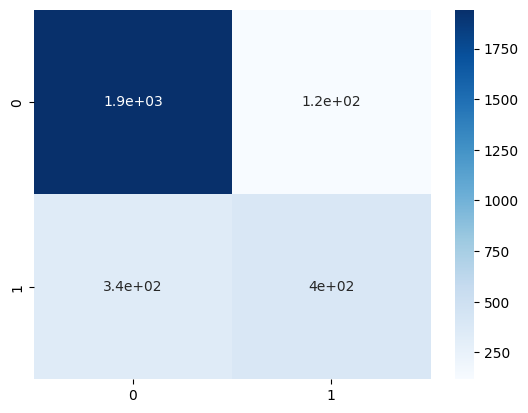

In [13]:
cm = confusion_matrix(y_test, y_predict_KN)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, cmap='Blues')

Таким образом, по матрице неточностей можно сделать вывод о том, что в целом, прогноз оказался верным, причем модель не склонялась ни в строну оптимиза, ни в сторону пессимизма. А значит, данная модель строго и формально определяет: подходит ли значение классу или нет.

Далее, был изучен метод логистической регрессии. Реалзиация данного метода аналогично предыдущему, поэтому можно сразу провести обучение данной модели, получить предсказание результата, и проанализировать получившиеся метрики.

In [14]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_predict_LR = LR.predict(x_test)
result_metrics.append([accuracy_score(y_test, y_predict_LR),precision_score(y_test, y_predict_LR), 
                      recall_score(y_test, y_predict_LR),f1_score(y_test, y_predict_LR),balanced_accuracy_score(y_test,y_predict_LR)])
result_metrics

[[0.8360714285714286,
  0.7732558139534884,
  0.5384615384615384,
  0.6348448687350835,
  0.7408189188179475],
 [0.9257142857142857,
  0.869625520110957,
  0.8461538461538461,
  0.8577291381668946,
  0.9002503082153398]]

Таким образом видно, что в сравнении с предыдущей моделью, логистическая регрессия получила более точную модель и сформировала более верные прогнозы. Попробуем, при помощи матрицы неточностей, узнать за счет чего увеличилась точность модели.

<AxesSubplot:>

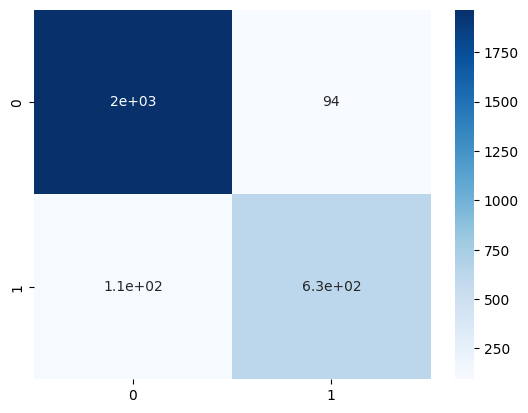

In [15]:
cm = confusion_matrix(y_test, y_predict_LR)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, cmap='Blues')

Видно, что оптимистичных прогнозов гораздо меньше, чем пессимистичных, а значит, данная система позволяет больше подстраховаться и подготовится к потенциальным ошибкам и скорректировать систему. Возможно именно за счет пессиместичных результататов были правильно спрогнозированы и другие результаты.

Наконец, проанализируем модель случайного леса.

In [16]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)
y_predict_RFC = RFC.predict(x_test)
result_metrics.append([accuracy_score(y_test, y_predict_RFC),precision_score(y_test, y_predict_RFC), 
                      recall_score(y_test, y_predict_RFC),f1_score(y_test, y_predict_RFC),balanced_accuracy_score(y_test,y_predict_RFC)])
result_metrics

[[0.8360714285714286,
  0.7732558139534884,
  0.5384615384615384,
  0.6348448687350835,
  0.7408189188179475],
 [0.9257142857142857,
  0.869625520110957,
  0.8461538461538461,
  0.8577291381668946,
  0.9002503082153398],
 [0.9042857142857142,
  0.8599695585996956,
  0.7624831309041835,
  0.8082975679542203,
  0.8589006232471379]]

В итоге видно, что данный метод не сильно отличается от логистической регрессии и имеет почти такие же значения метрик, а значит, данную модель можно использовать на равне с логистической регрессией. Далее, монжо проанализировать матрицу неточностей.

<AxesSubplot:>

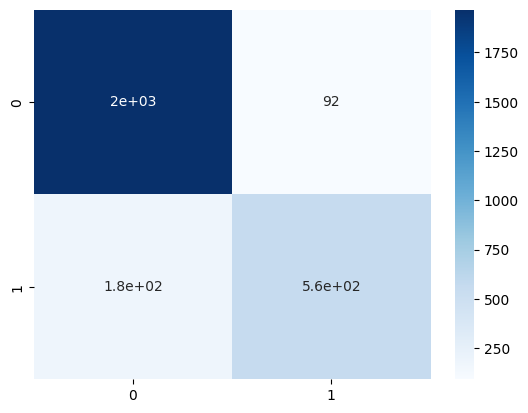

In [17]:
cm = confusion_matrix(y_test, y_predict_RFC)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, cmap='Blues')

В итоге видно, что данная модель также имеет больший уклон в сторону пессиместичных прогнозов, а значит, данная модель также может использоваться для формирования более строгих требований и целей для улучшения различных показателей.

In [22]:
print(tn, fp, fn, tp)

1967 92 176 565


Далее, можно построить график ROC, опрделяющий качество бинарной классификации. Так как у нас имеется параметр с двумя значениями, котопый мы прогнозируем, то данный график отлично подходит для визуального отображения результатов.

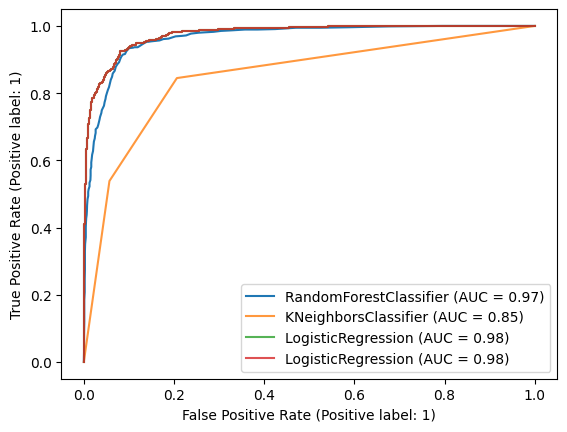

In [18]:
Rasp_disp = RocCurveDisplay.from_estimator(RFC, x_test, y_test)
ax = plt.gca()
Rasp_disp = RocCurveDisplay.from_estimator(KN, x_test, y_test, ax=ax, alpha=0.8)
Rasp_disp = RocCurveDisplay.from_estimator(LR, x_test, y_test, ax=ax, alpha=0.8)
Rasp_disp.plot(ax=ax, alpha=0.8)
plt.show()

Так, на данном графике видны все три модели, созданные ранее, а тажке в легенде отображаются коэффициенты, которые показывают насколько получившася модель эффективнее по сравнению с другими. Так, видно, что логистическая регрессия оказалась наиболее эффективной, но метод случайного леса отличается всего на 0.01, значит, данный метод также можно использовать для классификации. Наконец, метод k- ближайших соседей оказался наименее эффективным, однако, это может быть связано с выбором количества соседей. Поэтому, можно попробовать найти оптимальное число ближайших соседей, при котором модель будет наиболее точной. Для этого, была использована метрика accuracy_score

29
[0.8360714285714286, 0.8460714285714286, 0.8467857142857143, 0.8575, 0.8496428571428571, 0.8553571428571428, 0.8517857142857143, 0.8557142857142858, 0.8592857142857143, 0.8585714285714285, 0.8617857142857143, 0.8625, 0.8635714285714285, 0.86, 0.8639285714285714, 0.8617857142857143, 0.8607142857142858, 0.8614285714285714, 0.8625, 0.8621428571428571, 0.8632142857142857, 0.8635714285714285, 0.8653571428571428, 0.8639285714285714, 0.8667857142857143, 0.8678571428571429, 0.8696428571428572, 0.8682142857142857]


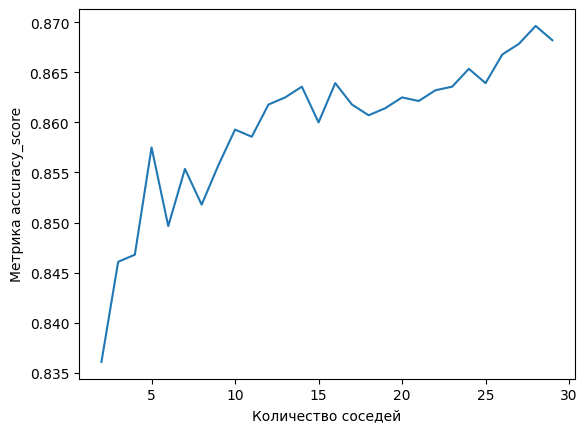

In [21]:
KN = KNeighborsClassifier(n_neighbors=2)
KN.fit(x_train,y_train)
y_predict_KN = KN.predict(x_test)
x = []
res_score = []
for i in range(2,30):
    x.append(i)
    KN = KNeighborsClassifier(n_neighbors=i)
    KN.fit(x_train,y_train)
    y_predict_KN = KN.predict(x_test)
    res_score.append(accuracy_score(y_test, y_predict_KN))
print(i)
print(res_score)
plt.plot(x,res_score)
plt.xlabel("Количество соседей")
plt.ylabel("Метрика accuracy_score")
plt.show()

Таким образом видно, что с увеличением количества соседей увеличивается и точность модели. Попробуем построить ROC кривые уже с учетом набилоее точной модели для количества соседей равного 28.

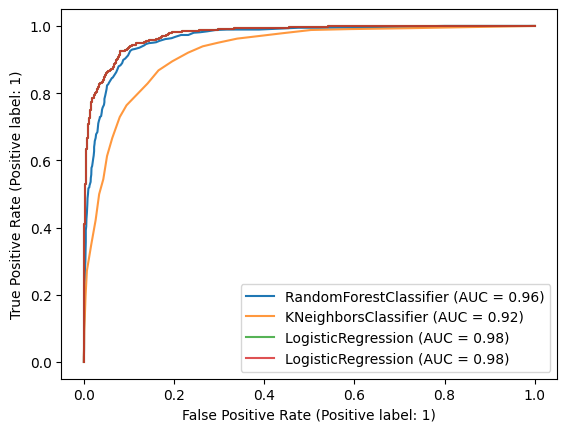

In [145]:
KN = KNeighborsClassifier(n_neighbors=28)
KN.fit(x_train,y_train)
y_predict_KN = KN.predict(x_test)
Rasp_disp = RocCurveDisplay.from_estimator(RFC, x_test, y_test)
ax = plt.gca()
Rasp_disp = RocCurveDisplay.from_estimator(KN, x_test, y_test, ax=ax, alpha=0.8)
Rasp_disp = RocCurveDisplay.from_estimator(LR, x_test, y_test, ax=ax, alpha=0.8)
Rasp_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [6]:
res = pd.DataFrame(result_metrics)
res

""


Таким образом видно, что метод k ближайших соседей оказался более точным, чем раньше, но разница между другими методами все еще заметная.

**Вывдоы:** 
В результате проведенной работы были изучены различные способы классификации, и была произведена попытка сравнить их при помощи различных метрик.

Так, в ходе работы были изучены три метрики: метод k-ближайших соседей, случайный лес и логистическая регрессия. Каждый из трех методов имеет различный подход к классификации, и, соответственно, каждый из них дает разный результат. В результате, получается модель, которую можно использовать для предсказывания некоторого ключевого признака по различным параметрам. Так, в ходе работы, был взят показатель ухода из клуба, который необходимо предсказать по другим параметрам.

Кроме этого, было выявлено, что для набора данных спортивного клуба наиболее выгодням оказался метод логистической регрессии, а наименее точным стал метод k-средних. Вероятнее всего, это связано с тем, что в наборе данных крайне мало чиловых значений, большинство из них либо являются бинарными, либо имеют строго заданные значения (как числа месяцев).

Кроме этого, при помощи матрицы неточностей были проанализированы полученные значения. Так, для наиболее точного метода - логистисческой регрессии, большая часть прогоза совпала с реальными значениями, но часто данная модель предсказывает пессимистиченые прогнозы, то есть, данная модель скорее скажет, что человек уйдет из клуба, чем останется. Вместе с этим, точных попаданий все же гораздо больше неверных результатов. А значит, данную модель вплоне можно использовать для принятия решений по улучшению сервиса клуба с учетом худшего результата.

Таким образом видно, что при помощи различных методов можно формировать модели, с помощью которых можно прдесказывать различные параметры и на основе полуенных прогнозов принимать решения по деятельности организации.


